<a href="https://colab.research.google.com/github/BahodirML/Comp_Vision_Pro/blob/main/Keras_Pretrained_Models_1_VGG16%2C_ResNet%2C_Inceptionv3%2C_MobileNetv2%2C_DenseNet201%2C_MobileMNASNet_and_EfficientNet_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Using Pre-trained Models in Keras**
### **We'll load the weights of advanced pretrained models such as:**

---


1. VGG16
2. ResNet
3. Inception v3
4. MobileNet v2
5. DenseNet201
6. Mobile NASNet
7. EfficientNetB7

https://keras.io/api/applications/

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')
model.summary()

553467096/553467096 [==============================] - 26s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [2]:
!gdown --id 1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
!unzip images.zip
!rm rf images/class1/.DS_Store

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VyfggIFN2H6cubfh3_yUdicNicZa9sAp
To: /content/images.zip
100% 1.46M/1.46M [00:00<00:00, 133MB/s]
Archive:  images.zip
   creating: images/
  inflating: images/.DS_Store        
   creating: images/class1/
  inflating: images/class1/.DS_Store  
  inflating: images/class1/1539714414867.jpg  
  inflating: images/class1/81z6x3SZEpL._AC_SL1500_.jpg  
  inflating: images/class1/Basketball_(Ball).jpg  
  inflating: images/class1/German_Shepherd_-_DSC_0346_(10096362833).jpg  
  inflating: images/class1/christmas-stockings-3006869_1280.jpg  
  inflating: images/class1/download.jpg  
  inflating: images/class1/limo-safety-ftr.jpg  
  inflating: images/class1/long-haired-collie-5766447_1280.jpg  
  inflating: images/class1/spid

In [3]:
import cv2
from os import listdir
from os.path import isfile, join

# Get images located in ./images folder
mypath = "./images/class1/"
file_names = [f for f in listdir(mypath) if isfile(join(mypath, f))]
file_names

['1539714414867.jpg',
 'German_Shepherd_-_DSC_0346_(10096362833).jpg',
 'limo-safety-ftr.jpg',
 'long-haired-collie-5766447_1280.jpg',
 'spiderweb_1050x700.jpg',
 'download.jpg',
 'christmas-stockings-3006869_1280.jpg',
 'Basketball_(Ball).jpg',
 '81z6x3SZEpL._AC_SL1500_.jpg']

35363/35363 [==============================] - 0s 1us/step
[('n07880968', 'burrito', 0.9861623), ('n07583066', 'guacamole', 0.009183114), ('n07697537', 'hotdog', 0.0019693847)]
1/1 [==============================] - 0s 32ms/step
[('n02106662', 'German_shepherd', 0.9971945), ('n02105162', 'malinois', 0.0026380394), ('n02096051', 'Airedale', 2.8504863e-05)]
1/1 [==============================] - 0s 28ms/step
[('n03670208', 'limousine', 0.9995695), ('n03100240', 'convertible', 0.00019120035), ('n02814533', 'beach_wagon', 7.828796e-05)]
1/1 [==============================] - 0s 17ms/step
[('n02106030', 'collie', 0.89366984), ('n02105855', 'Shetland_sheepdog', 0.10570214), ('n02096294', 'Australian_terrier', 9.377018e-05)]
1/1 [==============================] - 0s 17ms/step
[('n04275548', 'spider_web', 0.9770248), ('n01773797', 'garden_spider', 0.011420561), ('n01773549', 'barn_spider', 0.009331544)]
1/1 [==============================] - 0s 17ms/step
[('n03930313', 'picket_fence', 0.110952

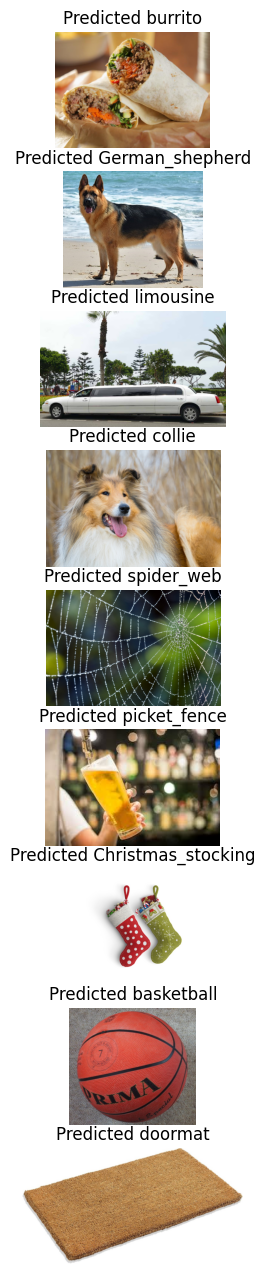

In [4]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **2. ResNet50**

In [5]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 [==============================] - 5s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

1/1 [==============================] - 2s 2s/step
[('n07880968', 'burrito', 0.99920565), ('n07583066', 'guacamole', 0.00043267498), ('n03041632', 'cleaver', 0.0001623319)]
1/1 [==============================] - 0s 22ms/step
[('n02106662', 'German_shepherd', 0.999471), ('n02105162', 'malinois', 0.00028946588), ('n02115641', 'dingo', 7.170621e-05)]
1/1 [==============================] - 0s 21ms/step
[('n03670208', 'limousine', 0.9998456), ('n03770679', 'minivan', 6.815604e-05), ('n02814533', 'beach_wagon', 4.923043e-05)]
1/1 [==============================] - 0s 37ms/step
[('n02106030', 'collie', 0.9778243), ('n02105855', 'Shetland_sheepdog', 0.02025921), ('n02129165', 'lion', 0.00055881403)]
1/1 [==============================] - 0s 23ms/step
[('n04275548', 'spider_web', 0.9995158), ('n01773797', 'garden_spider', 0.00036500563), ('n01773549', 'barn_spider', 9.729284e-05)]
1/1 [==============================] - 0s 22ms/step
[('n02823428', 'beer_bottle', 0.7365768), ('n02823750', 'beer_gl

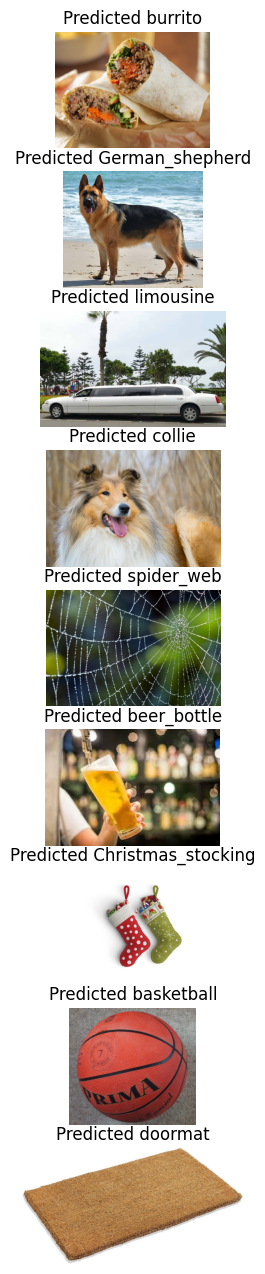

In [6]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **3. Inception V3**

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

model = InceptionV3(weights='imagenet')

model.summary()

96112376/96112376 [==============================] - 6s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activatio

[('n03670208', 'limousine', 0.96181005), ('n02917067', 'bullet_train', 0.00025204098), ('n02992529', 'cellular_telephone', 0.0002514693)]
[('n02802426', 'basketball', 0.99989593), ('n01770081', 'harvestman', 3.449915e-06), ('n02279972', 'monarch', 2.4240476e-06)]
[('n02105855', 'Shetland_sheepdog', 0.8346244), ('n02106030', 'collie', 0.12695172), ('n04501370', 'turnstile', 0.00827624)]
[('n02106662', 'German_shepherd', 0.8696459), ('n03803284', 'muzzle', 0.027263151), ('n02091467', 'Norwegian_elkhound', 0.0017647374)]
[('n03026506', 'Christmas_stocking', 0.9989465), ('n04254777', 'sock', 4.0287247e-05), ('n02028035', 'redshank', 3.1300242e-05)]
[('n03223299', 'doormat', 0.949517), ('n04599235', 'wool', 0.002864598), ('n03482405', 'hamper', 0.00079727924)]
[('n07880968', 'burrito', 0.9858155), ('n07697313', 'cheeseburger', 0.00040893583), ('n07583066', 'guacamole', 0.00027678796)]
[('n04275548', 'spider_web', 0.75735724), ('n01773797', 'garden_spider', 0.010265451), ('n04548362', 'walle

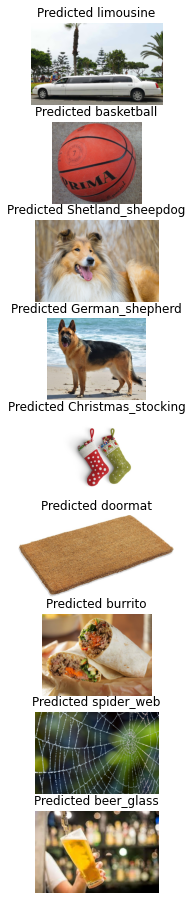

In [ ]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #note the change in input image size to 299,299
    img = image.load_img(mypath+file, target_size=(299, 299))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **4. MobileNet**

In [9]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

model = MobileNetV2(weights='imagenet')
model.summary()

14536120/14536120 [==============================] - 2s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_4[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (R

1/1 [==============================] - 1s 1s/step
[('n07880968', 'burrito', 0.9276107), ('n07717556', 'butternut_squash', 0.01587576), ('n07697537', 'hotdog', 0.008509782)]
1/1 [==============================] - 0s 23ms/step
[('n02106662', 'German_shepherd', 0.9593247), ('n02115641', 'dingo', 0.0023736008), ('n02105162', 'malinois', 0.0022563618)]
1/1 [==============================] - 0s 21ms/step
[('n03670208', 'limousine', 0.96964127), ('n03100240', 'convertible', 0.013182329), ('n04285008', 'sports_car', 0.0016838842)]
1/1 [==============================] - 0s 21ms/step
[('n02106030', 'collie', 0.8865847), ('n02105855', 'Shetland_sheepdog', 0.069085546), ('n02112137', 'chow', 0.0015462848)]
1/1 [==============================] - 0s 24ms/step
[('n04275548', 'spider_web', 0.77539974), ('n01773797', 'garden_spider', 0.04064544), ('n01773549', 'barn_spider', 0.038877547)]
1/1 [==============================] - 0s 25ms/step
[('n03888605', 'parallel_bars', 0.13551457), ('n02823428', 'bee

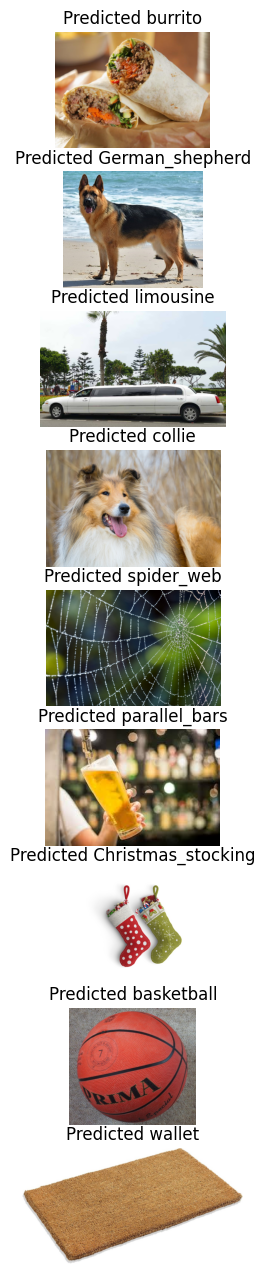

In [10]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    #from keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **5. DenseNet201**

In [11]:
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.densenet import preprocess_input
import numpy as np

model = DenseNet201(weights='imagenet')
model.summary()

82524592/82524592 [==============================] - 5s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_5[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormali

1/1 [==============================] - 0s 35ms/step
[('n07880968', 'burrito', 0.99977976), ('n07875152', 'potpie', 8.77321e-05), ('n07871810', 'meat_loaf', 3.202138e-05)]
1/1 [==============================] - 0s 36ms/step
[('n02106662', 'German_shepherd', 0.966325), ('n02115641', 'dingo', 0.0035318658), ('n02105162', 'malinois', 0.00260683)]
1/1 [==============================] - 0s 33ms/step
[('n03670208', 'limousine', 0.9999536), ('n03100240', 'convertible', 3.6001104e-05), ('n02814533', 'beach_wagon', 4.123108e-06)]
1/1 [==============================] - 0s 36ms/step
[('n02106030', 'collie', 0.69736314), ('n02105855', 'Shetland_sheepdog', 0.286182), ('n02129165', 'lion', 0.005980669)]
1/1 [==============================] - 0s 36ms/step
[('n04275548', 'spider_web', 0.9788881), ('n01773797', 'garden_spider', 0.009407125), ('n01773157', 'black_and_gold_garden_spider', 0.0056368005)]
1/1 [==============================] - 0s 36ms/step
[('n07615774', 'ice_lolly', 0.4519819), ('n02823750

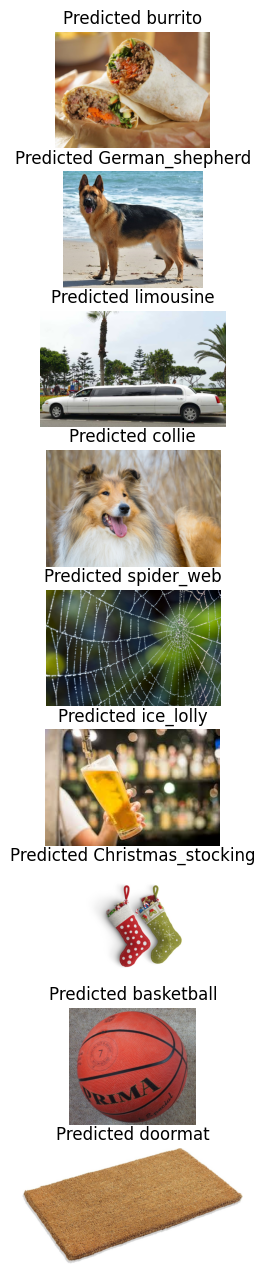

In [13]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

# **6. Mobile NASNet**

In [14]:
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input
import numpy as np

model = NASNetMobile(weights='imagenet')
model.summary()

24227760/24227760 [==============================] - 2s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_6[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_94 (Activation) 

1/1 [==============================] - 4s 4s/step
[('n07880968', 'burrito', 0.95520025), ('n07583066', 'guacamole', 0.002172781), ('n07873807', 'pizza', 0.0006251528)]
1/1 [==============================] - 0s 40ms/step
[('n02106662', 'German_shepherd', 0.9477187), ('n02105162', 'malinois', 0.001822115), ('n03803284', 'muzzle', 0.0010249857)]
1/1 [==============================] - 0s 40ms/step
[('n03670208', 'limousine', 0.8703649), ('n03770679', 'minivan', 0.0036161786), ('n03100240', 'convertible', 0.0033132595)]
1/1 [==============================] - 0s 39ms/step
[('n02106030', 'collie', 0.74450797), ('n02105855', 'Shetland_sheepdog', 0.18703984), ('n01735189', 'garter_snake', 0.00087125506)]
1/1 [==============================] - 0s 38ms/step
[('n04275548', 'spider_web', 0.87474054), ('n01773549', 'barn_spider', 0.018139837), ('n01773797', 'garden_spider', 0.01096742)]
1/1 [==============================] - 0s 39ms/step
[('n04270147', 'spatula', 0.07396553), ('n03983396', 'pop_bott

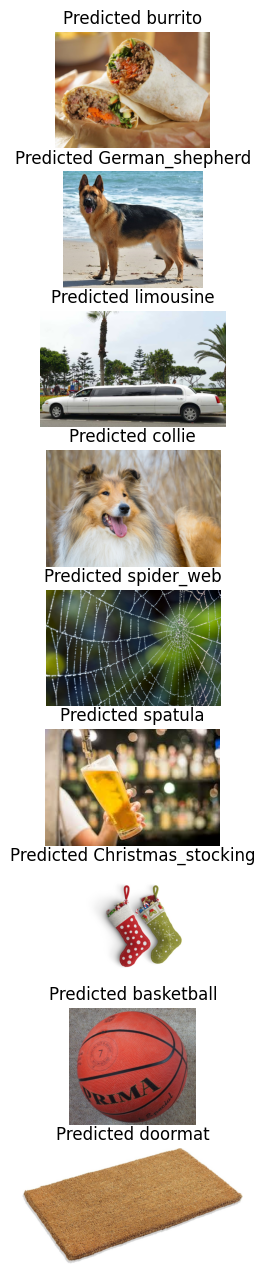

In [15]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    img = image.load_img(mypath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()

## **7. EfficientNetB7**

Try other EfficientNets B0 to B7 - https://keras.io/api/applications/efficientnet/

In [16]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np

model = EfficientNetB7(weights='imagenet')
model.summary()

268326632/268326632 [==============================] - 15s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 600, 600, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 600, 600, 3)          0         ['input_7[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 600, 600, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Res

1/1 [==============================] - 8s 8s/step
[('n07880968', 'burrito', 0.8131528), ('n07583066', 'guacamole', 0.0021762683), ('n07875152', 'potpie', 0.0016002922)]
1/1 [==============================] - 0s 64ms/step
[('n02106662', 'German_shepherd', 0.761189), ('n02105162', 'malinois', 0.002567432), ('n03803284', 'muzzle', 0.0017310425)]
1/1 [==============================] - 0s 62ms/step
[('n03670208', 'limousine', 0.8450936), ('n02814533', 'beach_wagon', 0.0008681026), ('n03770679', 'minivan', 0.0007900423)]
1/1 [==============================] - 0s 61ms/step
[('n02106030', 'collie', 0.6698268), ('n02105855', 'Shetland_sheepdog', 0.10821695), ('n02105251', 'briard', 0.0020339217)]
1/1 [==============================] - 0s 60ms/step
[('n04275548', 'spider_web', 0.78576773), ('n01773549', 'barn_spider', 0.019237032), ('n01773797', 'garden_spider', 0.008757851)]
1/1 [==============================] - 0s 63ms/step
[('n02823750', 'beer_glass', 0.7418086), ('n02815834', 'beaker', 0.01

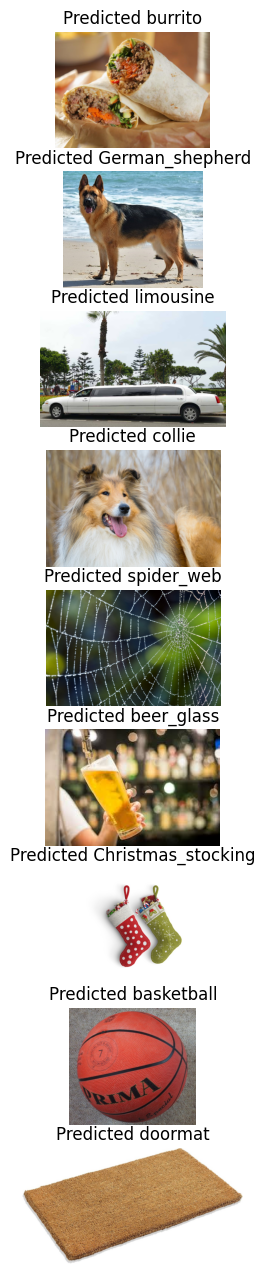

In [17]:
fig=plt.figure(figsize=(16,16))

# Loop through images run them through our classifer
for (i,file) in enumerate(file_names):

    # Note input size has increased to 600,600
    img = image.load_img(mypath+file, target_size=(600, 600))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    #load image using opencv
    img2 = cv2.imread(mypath+file)
    #imageL = cv2.resize(img2, None, fx=.5, fy=.5, interpolation = cv2.INTER_CUBIC)

    # Get Predictions
    preds = model.predict(x)
    preditions = decode_predictions(preds, top=3)[0]
    print(preditions)
    # Plot image
    sub = fig.add_subplot(len(file_names),1, i+1)
    sub.set_title(f'Predicted {str(preditions[0][1])}')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

plt.show()